# ---------------------------------------------------------------------
# |  Classification methods for Surgery prediction |
# ---------------------------------------------------------------------

### 1- Logistic regression
### 2- Descision tree & Random forest
### 3- KNN 


## Importing and prepration od data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classification
# ============

In [3]:
df_lc13=pd.read_csv('numric2.csv')
from sklearn.preprocessing import StandardScaler

In [4]:
df_drop_target=df_lc13.drop('surgery',axis=1)
scaler =StandardScaler()
scaler.fit(df_drop_target)
scaled_features= scaler.transform(df_drop_target)

In [5]:
df_feat=pd.DataFrame(scaled_features,columns=df_drop_target.columns)

In [6]:
df_feat

,Unnamed: 0,ER+,PR+,MRI1,LD1,NO of node,node coded,tomur location,tumor stage,node,M,stage,hermonal,chemo,ln,censor
0,-1.731883,-1.011916,0.998254,0.0,-0.614748,1.928012,2.199773,-0.595194,-0.507760,2.755453,-0.304313,1.720958,-0.582582,0.582582,-0.495193,-0.546536
1,-1.731546,0.988225,0.998254,0.0,0.514812,-0.369949,-0.454592,1.957409,0.568578,-0.425341,-0.304313,-0.481150,1.716496,-1.716496,0.587023,1.829707
2,-1.731210,0.988225,0.998254,0.0,-1.444045,0.089643,2.199773,-0.595194,-1.584098,0.634924,-0.304313,1.170431,1.716496,-1.716496,-0.495193,-0.546536
3,-1.730874,-1.011916,-1.001749,0.0,0.022953,-0.369949,-0.454592,0.255673,0.568578,-0.425341,-0.304313,0.069377,-0.582582,0.582582,-0.495193,-0.546536
4,-1.730537,0.988225,0.998254,0.0,0.443321,2.387604,2.199773,1.106541,0.568578,2.755453,-0.304313,1.720958,1.716496,-1.716496,-0.495193,-0.546536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,1.730537,0.988225,0.998254,0.0,-0.966484,1.008827,2.199773,0.255673,-0.507760,1.695188,3.286091,2.271485,1.716496,-1.716496,-0.495193,-0.546536
10296,1.730874,0.988225,0.998254,0.0,1.032407,-0.369949,-0.454592,0.255673,0.568578,-0.425341,-0.304313,0.069377,1.716496,-1.716496,2.751456,1.829707
10297,1.731210,-1.011916,0.998254,0.0,0.660654,-0.369949,-0.454592,-1.446062,0.568578,-0.425341,-0.304313,-0.481150,-0.582582,0.582582,-0.495193,-0.546536
10298,1.731546,-1.011916,0.998254,0.0,0.100163,-0.369949,-0.454592,-0.595194,0.568578,-0.425341,-0.304313,0.069377,-0.582582,0.582582,2.751456,1.829707


# 1-Decision Tree 

## Train one Tree:

In [46]:
x= df_feat
y=df_lc13['surgery']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
predictions3=dtree.predict(x_test)

## Evaluation 

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions3))
print('\n')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1741
           1       0.78      0.76      0.77      1658

    accuracy                           0.78      3399
   macro avg       0.78      0.78      0.78      3399
weighted avg       0.78      0.78      0.78      3399





array([[1737,    4],
       [ 603, 1055]], dtype=int64)

## Train Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_predict=rfc.predict(x_test)

In [61]:
from sklearn.metrics import classification_report
print('classification_report :')
print(classification_report(y_test,rfc_predict))
print('\n')
print('confusion_matrix :')

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rfc_predict)

classification_report :
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1741
           1       0.77      0.75      0.76      1658

    accuracy                           0.77      3399
   macro avg       0.77      0.77      0.77      3399
weighted avg       0.77      0.77      0.77      3399



confusion_matrix :


array([[1368,  373],
       [ 409, 1249]], dtype=int64)

# 2- KNN:

In [62]:
x= df_feat
y=df_lc13['surgery']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
predictions4=knn.predict(x_test)

## Evaluation 

In [64]:
from sklearn.metrics import classification_report
print('classification_report :')
print(classification_report(y_test,predictions4))
print('\n')
print('confusion_matrix :')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions4)

classification_report :
              precision    recall  f1-score   support

           0       0.74      0.98      0.85      1741
           1       0.96      0.65      0.78      1658

    accuracy                           0.82      3399
   macro avg       0.85      0.81      0.81      3399
weighted avg       0.85      0.82      0.81      3399



confusion_matrix :


array([[1702,   39],
       [ 584, 1074]], dtype=int64)

## choose correct K-value

In [79]:
error_rate=[]
for i in range(1,80):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i= knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

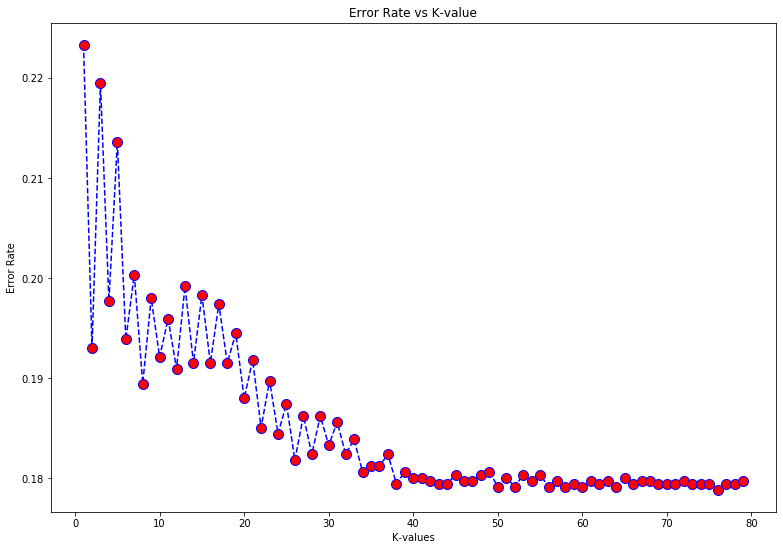

In [80]:
plt.figure(figsize=(13,9))
plt.plot(range(1,80), error_rate, color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize='10')
plt.title('Error Rate vs K-value')
plt.xlabel('K-values')
plt.ylabel('Error Rate')

In [83]:
knn= KNeighborsClassifier(n_neighbors=77)
knn.fit(x_train,y_train)
predic=knn.predict(x_test)

In [84]:
from sklearn.metrics import classification_report
print('classification_report :')
print(classification_report(y_test,predic))
print('\n')
print('confusion_matrix :')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predic)

classification_report :
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1741
           1       1.00      0.64      0.78      1658

    accuracy                           0.82      3399
   macro avg       0.87      0.82      0.81      3399
weighted avg       0.87      0.82      0.81      3399



confusion_matrix :


array([[1736,    5],
       [ 605, 1053]], dtype=int64)

# According to calclations:::
## Best Model in Surgrey  Claasification Predection is:
# (( KNN better than Decision Tree ))